<a href="https://colab.research.google.com/github/RUGameLink/Neural-networks-Lab-1/blob/main/101_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np, random as rd
from sklearn.cluster import KMeans
import random
import matplotlib.pyplot as plt
%pylab inline
from numpy.random import uniform
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

!pip install neupy
from neupy import algorithms

!pip install PyTorch
import torch as th

from scipy.special import expit

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['seed', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  ERROR: Failed building wheel for PyTorch
  Running setup.py clean for PyTorch
Failed to build PyTorch
    Running setup.py install for PyTorch ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-_m10fvfm/pytorch_e08d7ac936774926810f77ffa30631ce/setup.py'"'"'; __file__='"'"'/tmp/pip-install-_m10fvfm/pytorch_e08d7ac936774926810f77ffa30631ce/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-zvxxqrii/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/PyTorch Check the logs for full command output.


Пирсептрон

In [41]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.aclivation_func = self._unit_step_func
        self.weights = None
        self.bias = None
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_ = np.array([1 if i > 0 else 0 for i in y])
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.aclivation_func(linear_output)
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.aclivation_func(linear_output)
        return y_predicted
#функция активации (если результат сумматора >= 0, то результат = 1)
    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

Генерация, обучение и тест

In [42]:
def genBin():
  #параметры закона распределния
    n = 10
    p = 0.5
    #4 класстера         кол-во признаков, наблюдений
    b1 = uniform(n, p, (200, 2)) + 10
    b2 = uniform(n, p, (200, 2))
    b3 = uniform(n, p, (200, 2)) - 10
    b4 = uniform(n, p, (200, 2)) - 20
    #все строки, все столбцы
    #
    b = np.r_[b1[:,:], b2[:,:], b3[:, :], b4[:,:]]
    return b

b = genBin() #сгенерить 800 чисслеов 4-х классов
#Классификация прознаков, показываем что у нас 4 группы по 200 элентов
Y = [[] for i in range(800)]
for i in range(0, 200):
  Y[i] = 1
for i in range(200, 400):
  Y[i] = 2
for i in range(400, 600):
  Y[i] = 3
for i in range(600, 800):
  Y[i] = 4
Y = np.array(Y)
Y = Y.reshape((800,1))   

#нормализация
scaler = MinMaxScaler((0,1))
scaler.fit(b)
bn = scaler.transform(b)
print(bn)

#разделяем на обучающию и тестирующию
X_train, X_test, y_train, y_test = train_test_split(bn, Y, test_size = 0.4, random_state=123)

[[0.80042888 0.86597041]
 [0.87983629 0.80069611]
 [0.84246155 0.79623593]
 ...
 [0.18625389 0.1810631 ]
 [0.15787235 0.10040125]
 [0.04855258 0.23191313]]


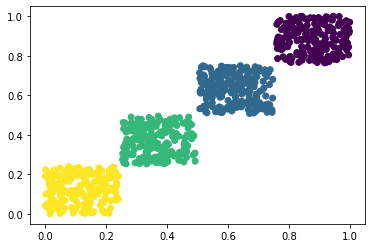

In [43]:
plt.scatter(bn[:, 0], bn[:, 1], c=Y)


Обучение


In [44]:
#отделить первый класс от других
y_train1 = [[] for _ in range(len(y_train))] #массив треннировки У
for _ in range(len(y_train)):
  if y_train[_] == 1:
    y_train1[_] = 1
  else :
    y_train1[_] = 0
y_train1 = np.array(y_train1)
y_train1 = y_train1.reshape((len(y_train), 1))

#отделить тестовый первый класс от других

y_test1 = [[] for _ in range(len(y_test))] #массив треннировки У
for _ in range(len(y_test)):
  if y_test[_] == 1:
    y_test1[_] = 1
  else :
    y_test1[_] = 0
y_test1 = np.array(y_test1)
y_test1 = y_test1.reshape((len(y_test), 1))

[[369   0]
 [  0 111]]


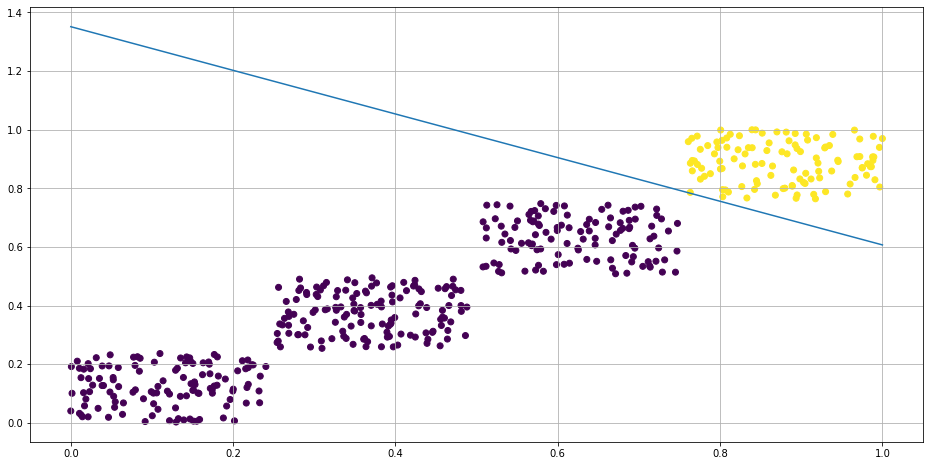

In [45]:
pr1 = Perceptron(n_iters=1000)

pr1.fit(X_train, y_train1)
pr1train = pr1.predict(X_train)

plt.figure(figsize=(16,8))
plt.scatter(X_train[:, 0], X_train[:, 1], marker = 'o', linewidths=1, c = pr1train)
plt.grid()

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-pr1.weights[0] * x0_1 - pr1.bias) / pr1.weights[1]
x1_2 = (-pr1.weights[0] * x0_2 - pr1.bias) / pr1.weights[1]

plt.plot([x0_1, x0_2], [x1_1, x1_2])

r = confusion_matrix(y_train1, pr1train)
print(r)

320
[[231   0]
 [  0  89]]


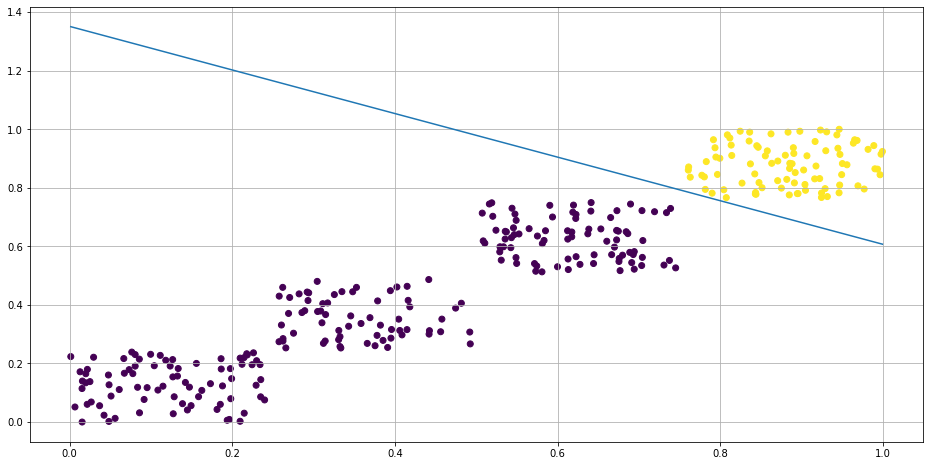

In [46]:

pr1test = pr1.predict(X_test)

plt.figure(figsize=(16,8))
plt.scatter(X_test[:, 0], X_test[:, 1], marker = 'o', linewidths=1, c = pr1test)
plt.grid()

x0_1 = np.amin(X_test[:, 0])
x0_2 = np.amax(X_test[:, 0])

x1_1 = (-pr1.weights[0] * x0_1 - pr1.bias) / pr1.weights[1]
x1_2 = (-pr1.weights[0] * x0_2 - pr1.bias) / pr1.weights[1]

plt.plot([x0_1, x0_2], [x1_1, x1_2])
print(len(y_test1))
r = confusion_matrix(y_test1, pr1test)
print(r)

In [47]:
#Убираем второй класс из обучающей выборки

y_train2 = np.delete(y_train, np.where(y_train == [1]), axis=0)
X_train2 = np.delete(X_train, np.where(y_train == [1]), axis=0)
y_train2n = [[] for _ in range(len(y_train2))] #массив треннировки У
for _ in range(len(y_train2)):
  if y_train2[_] == 2:
    y_train2n[_] = 1
  else:
    y_train2n[_] = 0

y_test2 = np.delete(y_test, np.where(y_test == [1]), axis=0)
X_test2 = np.delete(X_test, np.where(y_test == [1]), axis=0)
y_test2n = [[] for _ in range(len(y_test2))] #массив треннировки У
for _ in range(len(y_test2)):
  if y_test2[_] == 2:
    y_test2n[_] = 1
  else:
    y_test2n[_] = 0


[[255   0]
 [  0 114]]


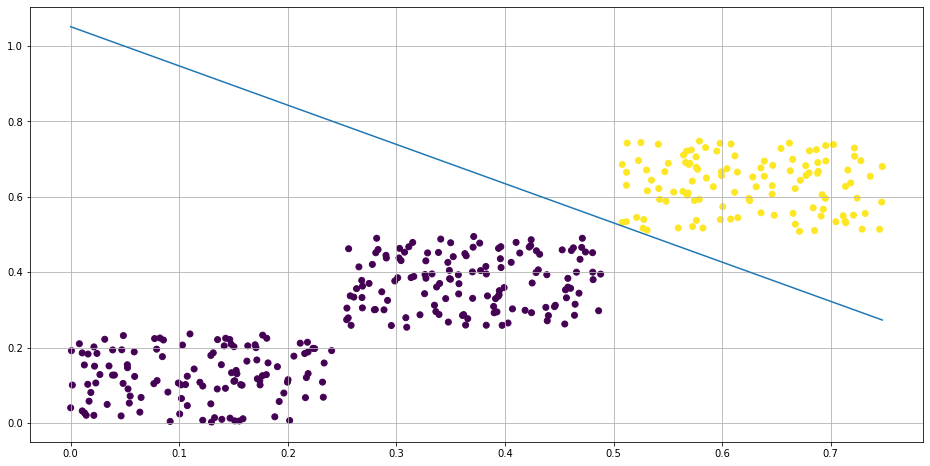

In [48]:
pr2 = Perceptron(n_iters=1000)

pr2.fit(X_train2, y_train2n)
pr2train = pr2.predict(X_train2)

plt.figure(figsize=(16,8))
plt.scatter(X_train2[:, 0], X_train2[:, 1], marker = 'o', linewidths=1, c = pr2train)
plt.grid()

x0_1 = np.amin(X_train2[:, 0])
x0_2 = np.amax(X_train2[:, 0])

x1_1 = (-pr2.weights[0] * x0_1 - pr2.bias) / pr2.weights[1]
x1_2 = (-pr2.weights[0] * x0_2 - pr2.bias) / pr2.weights[1]

plt.plot([x0_1, x0_2], [x1_1, x1_2])

r = confusion_matrix(y_train2n, pr2train)
print(r)

231
[[145   0]
 [  0  86]]


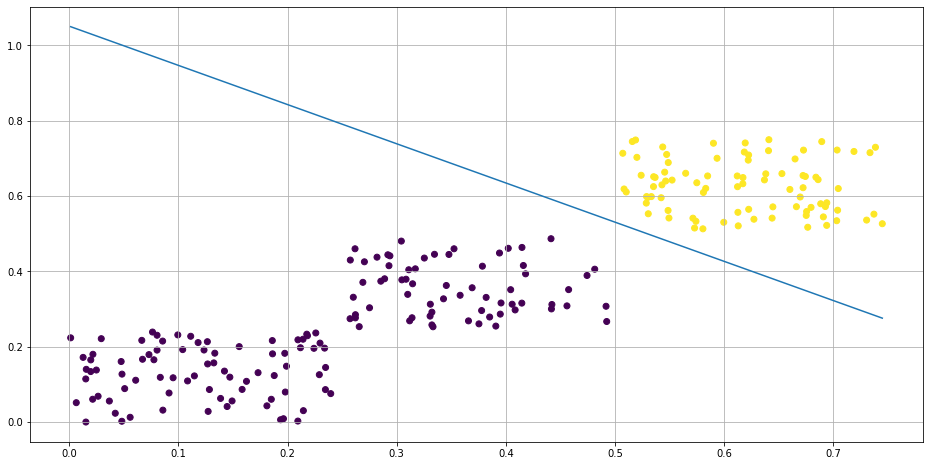

In [49]:

pr2test = pr2.predict(X_test2)

plt.figure(figsize=(16,8))
plt.scatter(X_test2[:, 0], X_test2[:, 1], marker = 'o', linewidths=1, c = pr2test)
plt.grid()

x0_1 = np.amin(X_test2[:, 0])
x0_2 = np.amax(X_test2[:, 0])

x1_1 = (-pr2.weights[0] * x0_1 - pr2.bias) / pr2.weights[1]
x1_2 = (-pr2.weights[0] * x0_2 - pr2.bias) / pr2.weights[1]

plt.plot([x0_1, x0_2], [x1_1, x1_2])
print(len(y_test2n))
r = confusion_matrix(y_test2n, pr2test)
print(r)

Продолжаем убирать

In [50]:
#Убираем третий класс из обучающей выборки
y_train3 = np.delete(y_train2, np.where(y_train2 == [2]), axis=0)
X_train3 = np.delete(X_train2, np.where(y_train2 == [2]), axis=0)
y_train3n = [[] for _ in range(len(y_train3))] #массив треннировки У
for _ in range(len(y_train3)):
  if y_train3[_] == 3:
    y_train3n[_] = 1
  else:
    y_train3n[_] = 0

y_test3 = np.delete(y_test2, np.where(y_test2 == [2]), axis=0)
X_test3 = np.delete(X_test2, np.where(y_test2 == [2]), axis=0)
y_test3n = [[] for _ in range(len(y_test3))] #массив треннировки У
for _ in range(len(y_test3)):
  if y_test3[_] == 3:
    y_test3n[_] = 1
  else:
    y_test3n[_] = 0

[[120   0]
 [  0 135]]


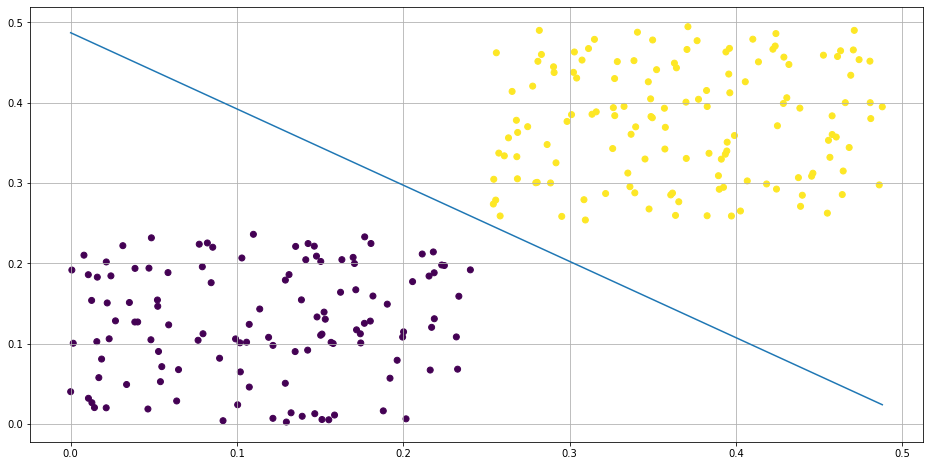

In [51]:
pr3 = Perceptron(n_iters=1000)

pr3.fit(X_train3, y_train3n)
pr3train = pr3.predict(X_train3)

plt.figure(figsize=(16,8))
plt.scatter(X_train3[:, 0], X_train3[:, 1], marker = 'o', linewidths=1, c = pr3train)
plt.grid()

x0_1 = np.amin(X_train3[:, 0])
x0_2 = np.amax(X_train3[:, 0])

x1_1 = (-pr3.weights[0] * x0_1 - pr3.bias) / pr3.weights[1]
x1_2 = (-pr3.weights[0] * x0_2 - pr3.bias) / pr3.weights[1]

plt.plot([x0_1, x0_2], [x1_1, x1_2])

r = confusion_matrix(y_train3n, pr3train)
print(r)

144
[[80  0]
 [ 0 64]]


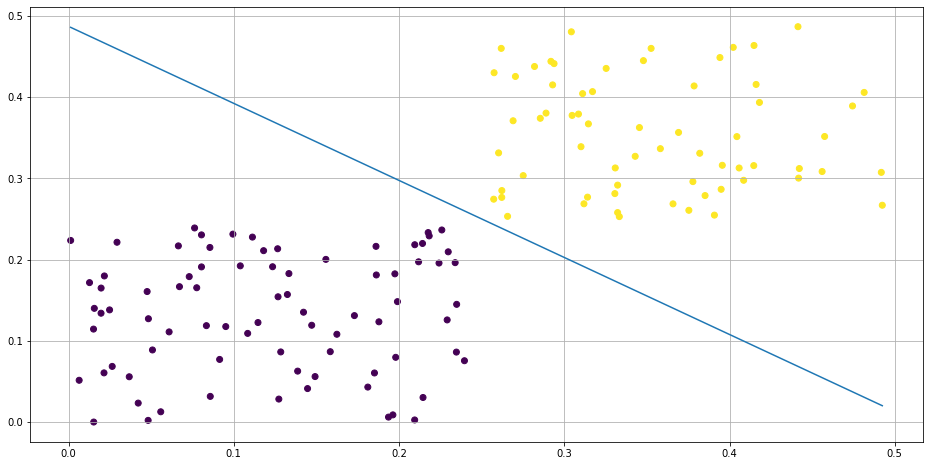

In [52]:
pr3test = pr3.predict(X_test3)

plt.figure(figsize=(16,8))
plt.scatter(X_test3[:, 0], X_test3[:, 1], marker = 'o', linewidths=1, c = pr3test)
plt.grid()

x0_1 = np.amin(X_test3[:, 0])
x0_2 = np.amax(X_test3[:, 0])

x1_1 = (-pr3.weights[0] * x0_1 - pr3.bias) / pr3.weights[1]
x1_2 = (-pr3.weights[0] * x0_2 - pr3.bias) / pr3.weights[1]

plt.plot([x0_1, x0_2], [x1_1, x1_2])
print(len(y_test3))
r = confusion_matrix(y_test3n, pr3test)
print(r)

Еще одна попытка

In [53]:
#Убираем четвертый класс из обучающей выборки
y_train4 = np.delete(y_train3, np.where(y_train3 == [3]), axis=0)
X_train4 = np.delete(X_train3, np.where(y_train3 == [3]), axis=0)
y_train4n = [[] for _ in range(len(y_train4))] #массив треннировки У
for _ in range(len(y_train4)):
  if y_train4[_] == 4:
    y_train4n[_] = 1
  else:
    y_train4n[_] = 0

y_test4 = np.delete(y_test3, np.where(y_test3 == [3]), axis=0)
X_test4 = np.delete(X_test3, np.where(y_test3 == [3]), axis=0)
y_test4n = [[] for _ in range(len(y_test4))] #массив треннировки У
for _ in range(len(y_test4)):
  if y_test4[_] == 4:
    y_test4n[_] = 1
  else:
    y_test4n[_] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


[[120]]


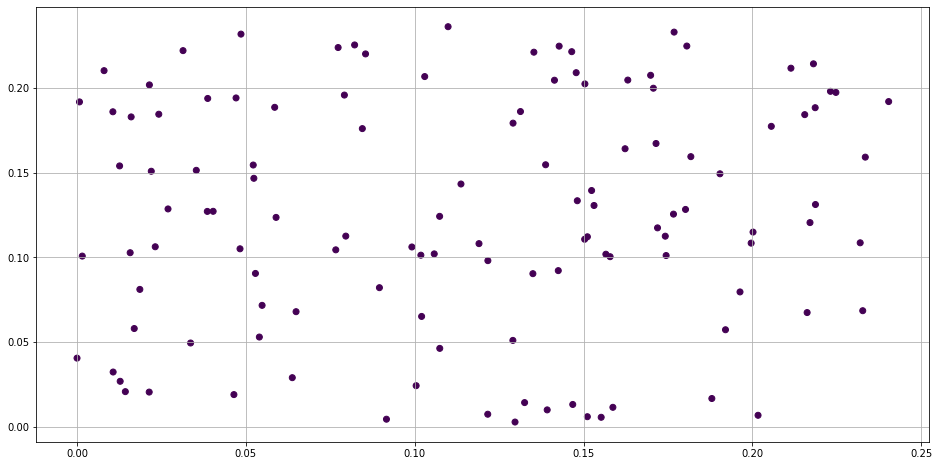

In [54]:
pr4 = Perceptron(n_iters=1000)

pr4.fit(X_train4, y_train4n)
pr4train = pr4.predict(X_train4)

plt.figure(figsize=(16,8))
plt.scatter(X_train4[:, 0], X_train4[:, 1], marker = 'o', linewidths=1, c = pr4train)
plt.grid()

x0_1 = np.amin(X_train4[:, 0])
x0_2 = np.amax(X_train4[:, 0])

x1_1 = (-pr4.weights[0] * x0_1 - pr4.bias) / pr4.weights[1]
x1_2 = (-pr4.weights[0] * x0_2 - pr4.bias) / pr4.weights[1]

plt.plot([x0_1, x0_2], [x1_1, x1_2])

r = confusion_matrix(y_train4n, pr4train)
print(r)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


[[79]]


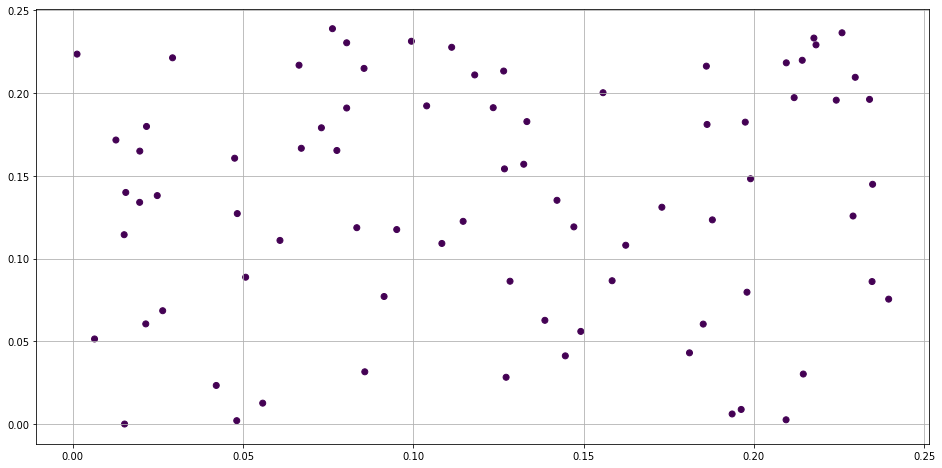

In [55]:
pr4test = pr4.predict(X_test4)

plt.figure(figsize=(16,8))
plt.scatter(X_test4[:, 0], X_test4[:, 1], marker = 'o', linewidths=1, c = pr4test)
plt.grid()

x0_1 = np.amin(X_test4[:, 0])
x0_2 = np.amax(X_test4[:, 0])

x1_1 = (-pr4.weights[0] * x0_1 - pr4.bias) / pr4.weights[1]
x1_2 = (-pr4.weights[0] * x0_2 - pr4.bias) / pr4.weights[1]

plt.plot([x0_1, x0_2], [x1_1, x1_2])

r = confusion_matrix(y_test4n, pr4test)
print(r)

Сеть Кохонена

In [56]:
class KohonenNet():
    def __init__(self, m=3, n=3, lr=1, sigma=1, max_iter=6000, weights = []):
        self.m = m #количество классов
        self.n = n #количество уровней сети
        self.shape = (m, n)
        self.initial_lr = lr
        self.lr = lr #скорость обучения
        self.sigma = sigma #параметр изменения скорости обучения (она будет снижаться с каждой итерацией)
        self.max_iter = max_iter

        self.weights = weights

#функция нахождения выйгравшего нейрона (нейрона с минимальным расстоянием до точки)
    def _find_bmu(self, x):
        x_stack = np.stack([x]*(self.m*self.n), axis=0)#матрица размером [количество центров кластеров(нейронов), количество признаков] (для каждого веса своя строка признаков(точка))
        distance = np.linalg.norm(x_stack - self.weights, axis=1)#эвклидовы расстояния между точкой выборки и нейронами
        return np.argmin(distance)#возвращаем индекс минимального расстояния (индекс подходящего нейрона)

    def step(self, x):
        x_stack = np.stack([x]*(self.m*self.n), axis=0)#матрица размером [количество весов, количество признаков] (для каждого веса своя строка признаков(точка))
        
        bmu_index = self._find_bmu(x)#передаем в функцию строку признаков (точку) и получаем индекс выйгравшего нейрона (центра кластера)
        self.weights[bmu_index] += self.lr * (x - self.weights[bmu_index])

    #обучение весов
    def fit(self, X, epochs=1, shuffle=True):
        global_iter_counter = 0
        n_samples = X.shape[0]#количество элементов выборки
        total_iterations = np.minimum(epochs * n_samples, self.max_iter)#количество обучения весов в эпохе

        for epoch in range(epochs):#изначально у нас 1 эпоха
            if global_iter_counter > self.max_iter:#не даем проводить больше 3000 эпох
                break

            if shuffle:
                indices = np.random.permutation(n_samples)#создание массива с индексами в разброс
            else:
                indices = np.arange(n_samples)#создание массива с индексами по порядку

            #обучение
            for idx in indices:#проход по выборке с индексами idx
                if global_iter_counter > self.max_iter:
                    break
                input = X[idx]
                #перемещение нейрона(изменение весов победившего нейрона)
                self.step(input)

                global_iter_counter += 1
                self.lr = (1 - (global_iter_counter / total_iterations)) * self.initial_lr#изменение параметра обучения

        self._n_iter_ = global_iter_counter

        return

    def returnChangedWeights(self):
      return self.weights

    def predict(self, X):
        labels = np.array([self._find_bmu(x) for x in X])
        return labels


In [57]:
from sklearn.cluster import MeanShift

In [58]:
subclust = MeanShift(bandwidth=0.1).fit(X_train)
weights = subclust.cluster_centers_
print(weights)


[[0.33764169 0.37249544]
 [0.10281298 0.15010793]
 [0.60068369 0.66443794]
 [0.85045499 0.88752696]]


Работа с сетью Кохонена

In [59]:
trainMax = np.amax(X_train)
trainMin = np.amin(X_train)
weights = np.random.uniform(trainMin, trainMax, (4,2))

[1 0 1 0 1 1 3 3 0 3 1 0 0 3 3 0 3 1 3 0 1 0 0 0 0 0 0 3 0 3 3 0 3 3 0 0 0
 3 3 0 3 1 0 3 1 3 1 0 3 3 3 1 0 0 0 1 0 1 0 3 3 3 3 3 0 3 3 0 0 1 0 0 0 1
 1 3 3 0 1 1 3 1 3 3 1 0 3 0 3 0 1 0 3 3 0 3 1 0 0 0 1 3 3 3 3 3 3 3 3 1 3
 0 0 1 3 0 3 1 0 3 3 3 1 3 3 3 3 0 0 0 0 0 0 0 3 0 3 3 1 3 0 0 3 3 3 0 3 1
 3 3 1 3 3 3 1 3 3 0 3 3 3 3 0 0 1 3 0 1 3 3 3 0 0 3 3 1 3 3 1 0 1 3 3 3 1
 3 3 1 3 1 3 1 3 3 3 1 3 3 3 0 1 3 0 3 3 3 1 1 0 1 1 3 1 1 0 0 3 0 1 3 0 1
 3 1 3 0 3 3 3 3 3 3 3 1 3 0 3 3 1 1 1 0 3 3 0 1 0 0 3 1 3 3 3 0 3 1 1 3 0
 0 3 3 3 0 0 3 1 3 3 3 3 3 3 0 3 1 3 3 0 0 0 1 1 3 3 1 0 0 0 0 0 3 3 3 3 0
 0 1 0 3 0 1 0 3 3 3 3 3 0 1 3 3 3 1 0 3 3 3 3 3 3 3 3 0 3 3 3 3 0 3 1 3 3
 3 1 3 0 1 1 3 1 3 3 0 0 3 3 3 0 0 3 1 1 3 0 0 1 0 0 3 3 0 3 0 0 3 1 1 1 0
 3 1 0 1 3 3 0 0 3 1 1 0 1 1 0 0 0 0 1 0 3 3 0 3 1 1 0 0 1 0 1 3 0 0 0 3 3
 3 0 1 0 1 0 0 0 0 3 1 0 3 3 3 1 3 0 3 1 3 0 3 3 3 3 0 0 3 3 0 0 1 0 1 1 1
 3 0 3 3 1 0 1 3 1 0 3 0 0 0 3 1 0 3 1 1 3 1 1 3 0 3 1 1 3 1 3 1 0 0 0 3]
[[  0   0   0   0   0]
 [ 

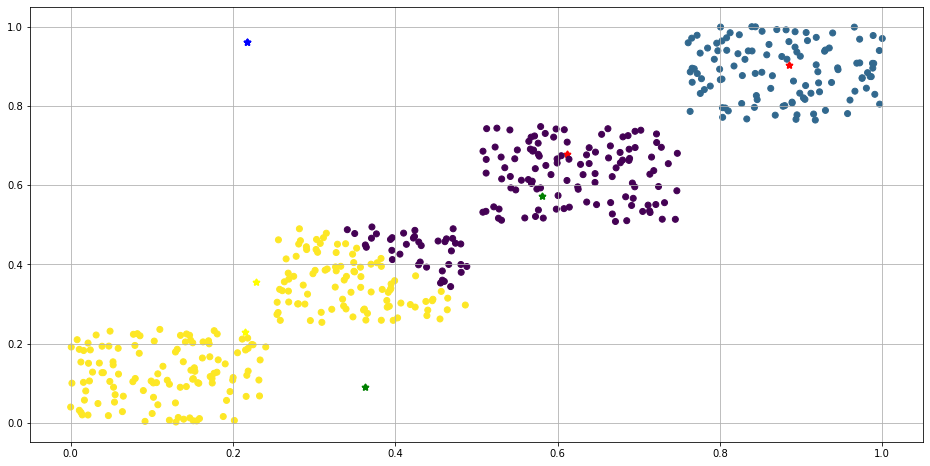

In [60]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot()
ax.scatter(weights[0,0], weights[0,1], marker='*', linewidths=2, c="GREEN")
ax.scatter(weights[1,0], weights[1,1], marker='*', linewidths=2, c="RED")
ax.scatter(weights[2,0], weights[2,1], marker='*', linewidths=2, c="BLUE")
ax.scatter(weights[3,0], weights[3,1], marker='*', linewidths=2, c="YEllow")

kohonen = KohonenNet(m=4, n=1, weights=weights)

kohonen.fit(X_train, shuffle=True)
predTrain = kohonen.predict(X_train)
ax.scatter(X_train[:,0], X_train[:,1], marker='o', linewidths=1, c=predTrain)
ax.grid()
ax.scatter(kohonen.returnChangedWeights()[0,0], kohonen.returnChangedWeights()[0,1], marker='*', linewidths=2, c="GREEN")
ax.scatter(kohonen.returnChangedWeights()[1,0], kohonen.returnChangedWeights()[1,1], marker='*', linewidths=2, c="RED")
ax.scatter(kohonen.returnChangedWeights()[2,0], kohonen.returnChangedWeights()[2,1], marker='*', linewidths=2, c="BLUE")
ax.scatter(kohonen.returnChangedWeights()[3,0], kohonen.returnChangedWeights()[3,1], marker='*', linewidths=2, c="YEllow")
print(predTrain)
predTrain = predTrain.reshape((len(predTrain),1))
print(confusion_matrix(y_train, predTrain))

[1 3 0 0 1 0 1 3 0 3 0 0 0 3 1 0 3 3 1 3 3 0 0 1 3 1 3 1 1 3 0 0 3 3 1 3 1
 0 3 3 3 0 3 0 0 1 1 1 3 3 3 3 3 0 1 3 3 0 0 3 0 0 3 1 1 0 1 3 1 1 0 0 3 1
 1 1 3 3 3 3 3 1 0 3 1 0 0 3 1 0 3 3 0 1 3 3 0 0 1 0 0 1 3 3 1 0 3 0 1 3 0
 1 3 1 3 0 0 3 3 0 0 0 3 0 0 1 1 1 3 1 0 0 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 1
 0 1 3 3 1 3 0 3 0 1 0 0 1 3 1 3 1 3 0 3 1 1 3 3 0 3 3 1 3 3 0 3 0 3 0 3 1
 0 1 1 0 3 0 1 1 3 1 3 1 1 3 0 0 0 3 0 3 3 0 1 3 3 3 0 3 1 0 3 1 0 3 3 3 1
 3 3 1 1 3 3 3 3 3 3 1 3 3 3 3 1 0 1 0 1 0 0 3 1 0 3 0 0 0 1 3 1 1 1 0 3 3
 1 3 0 0 1 1 1 0 1 3 3 0 1 3 0 3 3 3 3 0 0 0 0 3 1 0 0 1 3 0 3 3 1 0 1 3 0
 3 1 3 0 1 1 0 1 0 1 0 3 3 1 0 3 0 1 1 3 3 0 3 1]
[[ 0  0  0  0  0]
 [ 0 89  0  0  0]
 [86  0  0  0  0]
 [11  0  0 54  0]
 [ 0  0  0 80  0]]


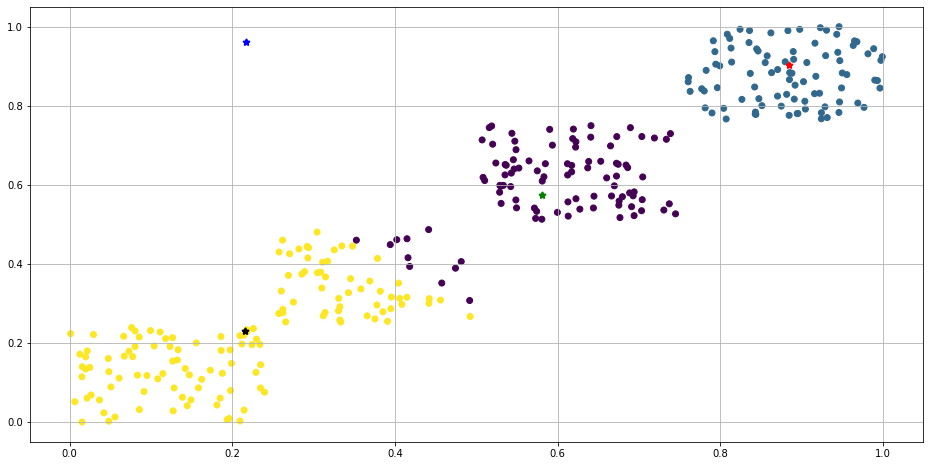

In [61]:

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot()
predTest = kohonen.predict(X_test)
ax.scatter(X_test[:,0], X_test[:,1], marker='o', linewidths=1, c=predTest)
ax.grid()
ax.scatter(kohonen.returnChangedWeights()[0,0], kohonen.returnChangedWeights()[0,1], marker='*', linewidths=2, c="GREEN")
ax.scatter(kohonen.returnChangedWeights()[1,0], kohonen.returnChangedWeights()[1,1], marker='*', linewidths=2, c="RED")
ax.scatter(kohonen.returnChangedWeights()[2,0], kohonen.returnChangedWeights()[2,1], marker='*', linewidths=2, c="BLUE")
ax.scatter(kohonen.returnChangedWeights()[3,0], kohonen.returnChangedWeights()[3,1], marker='*', linewidths=2, c="BLACK")
print(predTest)
predTrain = predTest.reshape((len(predTest),1))
print(confusion_matrix(y_test, predTest))

Сеть распознования

In [62]:
pnn = algorithms.PNN(std=10, verbose=False)
pnn.train(X_train, y_train)

[1 2 1 3 1 1 4 4 2 3 1 2 2 3 3 3 3 1 3 2 1 2 2 2 2 3 3 4 2 4 4 2 4 4 3 2 2
 4 4 2 4 1 3 4 1 4 1 2 3 3 3 1 2 2 2 1 2 1 2 4 4 4 4 4 2 4 4 2 2 1 3 2 2 1
 1 3 3 2 1 1 4 1 4 4 1 2 4 2 3 2 1 2 3 4 2 3 1 3 2 2 1 3 4 4 3 4 3 4 4 1 3
 2 2 1 4 2 3 1 2 4 4 3 1 4 4 3 3 2 2 3 2 2 2 3 3 2 4 3 1 3 2 2 4 4 3 2 3 1
 3 4 1 3 4 4 1 4 4 2 4 4 3 3 2 2 1 3 2 1 3 3 4 3 3 3 4 1 4 3 1 3 1 4 4 4 1
 4 3 1 3 1 4 1 4 3 4 1 4 4 3 2 1 3 3 4 3 3 1 1 2 1 1 3 1 1 2 3 4 2 1 3 2 1
 4 1 3 3 4 4 3 4 4 3 4 1 3 2 3 3 1 1 1 2 3 4 2 1 2 2 4 1 3 4 3 2 4 1 1 3 2
 2 3 3 4 3 2 4 1 4 4 4 4 4 4 2 4 1 4 3 2 2 2 1 1 3 4 1 2 2 3 3 2 4 4 3 3 2
 3 1 3 4 3 1 3 3 4 3 3 4 3 1 4 3 4 1 2 4 4 4 3 3 3 3 4 2 3 4 3 4 3 3 1 3 4
 4 1 4 2 1 1 4 1 3 3 2 3 3 4 4 2 2 3 1 1 4 2 2 1 3 2 3 3 2 4 2 2 4 1 1 1 2
 4 1 3 1 4 4 3 3 3 1 1 3 1 1 2 2 2 2 1 2 3 4 3 4 1 1 3 2 1 2 1 3 3 3 2 3 3
 4 2 1 3 1 2 2 2 2 4 1 2 4 3 4 1 4 2 3 1 4 2 3 3 4 4 3 2 3 4 2 2 1 2 1 1 1
 3 3 3 4 1 2 1 3 1 2 4 3 2 2 3 1 2 3 1 1 4 1 1 4 2 3 1 1 3 1 4 1 2 2 2 3]
[[111   0   0   0]
 [  0 1

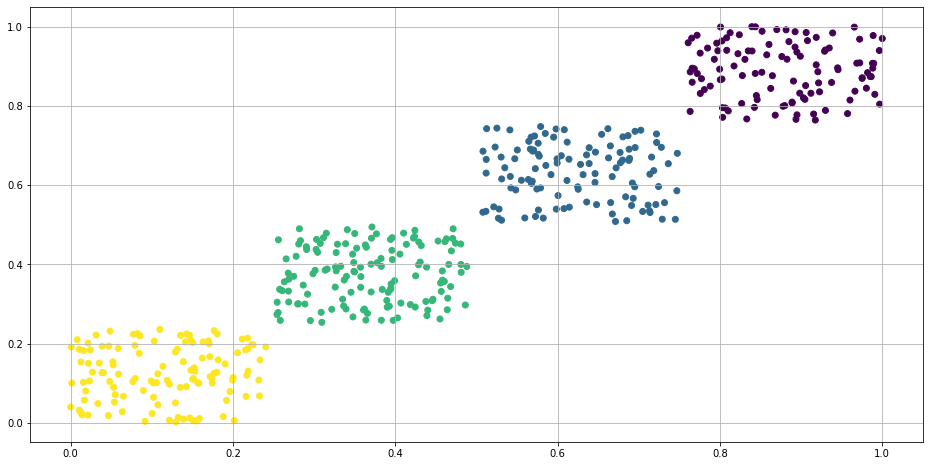

In [63]:
prY_Train = pnn.predict(X_train)
print(prY_Train)
r = confusion_matrix(y_train, prY_Train)
print(r)
plt.figure(figsize=(16,8))
plt.scatter(X_train[:,0], X_train[:,1], marker='o', linewidths=1, c= prY_Train)
plt.grid()


[1 3 2 2 1 2 1 4 2 4 2 2 2 3 1 2 3 3 1 4 3 2 2 1 4 1 3 1 1 4 2 2 3 3 1 4 1
 2 4 3 4 2 4 2 2 1 1 1 4 4 4 4 3 2 1 4 4 2 2 3 3 3 4 1 1 2 1 4 1 1 2 2 4 1
 1 1 3 4 4 3 3 1 2 3 1 3 3 4 1 2 4 4 2 1 3 4 2 2 1 2 3 1 3 3 1 2 3 2 1 4 2
 1 3 1 4 2 2 4 4 2 2 3 4 2 2 1 1 1 4 1 2 2 4 3 4 4 3 4 2 4 3 4 4 4 3 4 4 1
 2 1 4 4 1 3 2 4 2 1 2 2 1 4 1 4 1 4 2 3 1 1 3 4 2 3 4 1 4 3 2 4 2 4 2 3 1
 2 1 1 2 4 2 1 1 3 1 3 1 1 4 2 2 3 3 3 4 3 2 1 4 4 4 2 4 1 2 4 1 2 3 4 4 1
 4 3 1 1 4 3 3 3 3 3 1 4 4 3 3 1 2 1 2 1 2 3 4 1 2 4 2 2 3 1 4 1 1 1 2 4 3
 1 4 2 2 1 1 1 2 1 4 4 2 1 3 2 3 4 3 4 2 2 2 3 4 1 2 2 1 3 2 3 3 1 2 1 3 2
 4 1 4 2 1 1 2 1 2 1 2 4 3 1 2 3 2 1 1 3 4 2 4 1]
[[89  0  0  0]
 [ 0 86  0  0]
 [ 0  0 65  0]
 [ 0  0  0 80]]


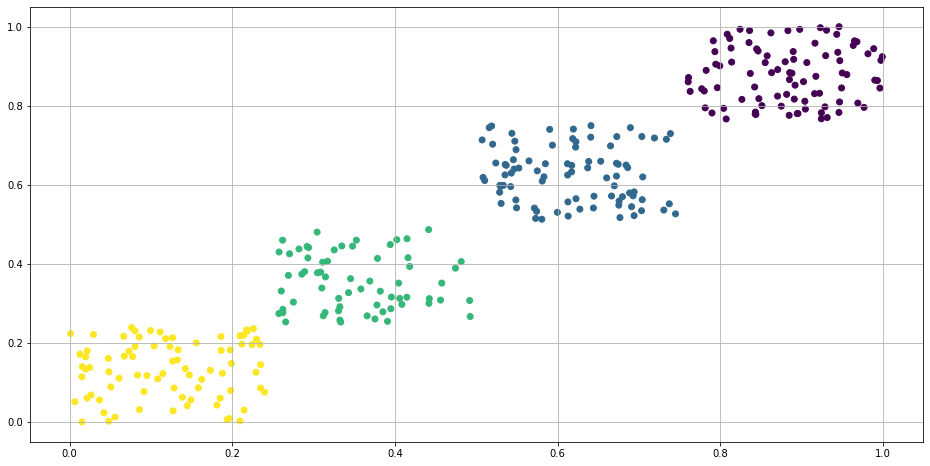

In [64]:
prY_Test = pnn.predict(X_test)
print(prY_Test)
r = confusion_matrix(y_test, prY_Test)
print(r)
plt.figure(figsize=(16,8))
plt.scatter(X_test[:,0], X_test[:,1], marker='o', linewidths=1, c= prY_Test)
plt.grid()


NeuralNetwork

In [65]:
from random import seed
from random import random

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))


# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
   
def transfer_derivative(output):
	return output * (1.0 - output)
 
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']

# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	
	######

def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))

In [66]:
blist = X_train.tolist()
Y_train=y_train-1
Y_train= Y_train.tolist()


In [67]:
for i in range(0, len(y_train)):
    blist[i]=blist[i]+Y_train[i]


In [68]:
print(blist)
dataset=blist
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))


[[0.84369981862761, 0.9993603705362925, 0], [0.6720261332200441, 0.643715223538029, 1], [0.8458411423637093, 0.8157868740723058, 0], [0.48082375896462176, 0.4000830429588681, 2], [0.8004288775466475, 0.8659704128974057, 0], [0.8102375431611231, 0.7873201625118863, 0], [0.0015506493001238852, 0.10075366616103215, 3], [0.047092740516732845, 0.19419901782605548, 3], [0.5773628073892503, 0.6731839992048025, 1], [0.37021607405870194, 0.33070940624271694, 2], [0.765714970462414, 0.8949482892681071, 0], [0.6851462513111071, 0.5104637127740825, 1], [0.7132529190205659, 0.5351445103135762, 1], [0.3895478429741355, 0.3092255978389861, 2], [0.28099210077513853, 0.45155862182391476, 2], [0.3940538744634915, 0.4631998122272021, 2], [0.35735091105602723, 0.3424178047747617, 2], [0.9185426285950257, 0.9035372455553996, 0], [0.3478246238740156, 0.2678057661904685, 2], [0.571566348358189, 0.7241041369377762, 1], [0.929961633272717, 0.7885949566000994, 0], [0.5483831530905975, 0.5880591046395591, 1], [0

In [69]:
network = initialize_network(n_inputs, 2, n_outputs)
train_network(network, dataset, 0.5, 200, n_outputs)
# # Make a prediction with a network
def predict(network, row):
  outputs = forward_propagate(network, row)
  return outputs.index(max(outputs))


>epoch=0, lrate=0.500, error=364.671
>epoch=1, lrate=0.500, error=317.123
>epoch=2, lrate=0.500, error=259.601
>epoch=3, lrate=0.500, error=234.669
>epoch=4, lrate=0.500, error=218.035
>epoch=5, lrate=0.500, error=196.033
>epoch=6, lrate=0.500, error=168.762
>epoch=7, lrate=0.500, error=144.888
>epoch=8, lrate=0.500, error=128.303
>epoch=9, lrate=0.500, error=117.432
>epoch=10, lrate=0.500, error=110.064
>epoch=11, lrate=0.500, error=104.775
>epoch=12, lrate=0.500, error=100.755
>epoch=13, lrate=0.500, error=97.537
>epoch=14, lrate=0.500, error=94.843
>epoch=15, lrate=0.500, error=92.495
>epoch=16, lrate=0.500, error=90.372
>epoch=17, lrate=0.500, error=88.393
>epoch=18, lrate=0.500, error=86.494
>epoch=19, lrate=0.500, error=84.633
>epoch=20, lrate=0.500, error=82.781
>epoch=21, lrate=0.500, error=80.923
>epoch=22, lrate=0.500, error=79.058
>epoch=23, lrate=0.500, error=77.198
>epoch=24, lrate=0.500, error=75.361
>epoch=25, lrate=0.500, error=73.568
>epoch=26, lrate=0.500, error=71.83

In [92]:
i=-1
for row in dataset:
    i=i+1
    prediction = predict(network, row)
    if (i==0):
      predictTrain = np.array([[prediction]])
    else:
      predictTrain =np.append(predictTrain,[[prediction]],axis=0)
print(len(y_train))
print(confusion_matrix(y_train, predictTrain))


480
[[  0   0   0   0   0]
 [110   1   0   0   0]
 [  0 114   0   0   0]
 [  0   0 135   0   0]
 [  0   0   0 120   0]]


In [79]:

i=-1
for row in X_test:
    i=i+1
    prediction = predict(network, row)
    if (i==0):
      predictTest = np.array([[prediction]])
    else:
      predictTest =np.append(predictTest,[[prediction]],axis=0)


In [80]:
print(confusion_matrix(y_test-1, predictTest))

[[89  0  0  0]
 [ 0 86  0  0]
 [ 0  0 65  0]
 [ 0  0  0 80]]
